# Create Corona Model  

In [1]:
import pandas as pd

# Reading Data

In [2]:
data=pd.read_csv('virusdata.csv')
data.shape

(2575, 6)

In [3]:
data.head()

,fever,bodyPain,age,runnyNose,diffBreath,infectionProb
0,98.332734,0,36,1,-1,0
1,101.488868,1,88,0,0,1
2,98.295029,1,71,1,-1,1
3,99.440096,1,80,0,1,0
4,98.917922,1,6,1,1,0


In [4]:
data.tail()

,fever,bodyPain,age,runnyNose,diffBreath,infectionProb
2570,100.426833,1,58,1,0,1
2571,99.970904,1,63,0,0,0
2572,98.072294,0,38,1,-1,1
2573,98.503010,1,55,0,1,1
2574,98.689390,0,83,0,0,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2575 entries, 0 to 2574
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fever          2575 non-null   float64
 1   bodyPain       2575 non-null   int64  
 2   age            2575 non-null   int64  
 3   runnyNose      2575 non-null   int64  
 4   diffBreath     2575 non-null   int64  
 5   infectionProb  2575 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 120.8 KB


In [6]:
data.describe()

,fever,bodyPain,age,runnyNose,diffBreath,infectionProb
count,2575.000000,2575.000000,2575.000000,2575.000000,2575.000000,2575.000000
mean,100.022494,0.493981,50.023301,0.491262,-0.006214,0.514175
std,1.169163,0.500061,28.635022,0.500021,0.810264,0.499896
min,98.000537,0.000000,1.000000,0.000000,-1.000000,0.000000
25%,98.979986,0.000000,26.000000,0.000000,-1.000000,0.000000
50%,100.031807,0.000000,50.000000,0.000000,0.000000,1.000000
75%,101.045854,1.000000,75.000000,1.000000,1.000000,1.000000
max,101.997330,1.000000,100.000000,1.000000,1.000000,1.000000


In [7]:
data['diffBreath'].value_counts()

 0    885
-1    853
 1    837
Name: diffBreath, dtype: int64

# Analyze data

C:\Users\sarry\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sarry\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sarry\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`,

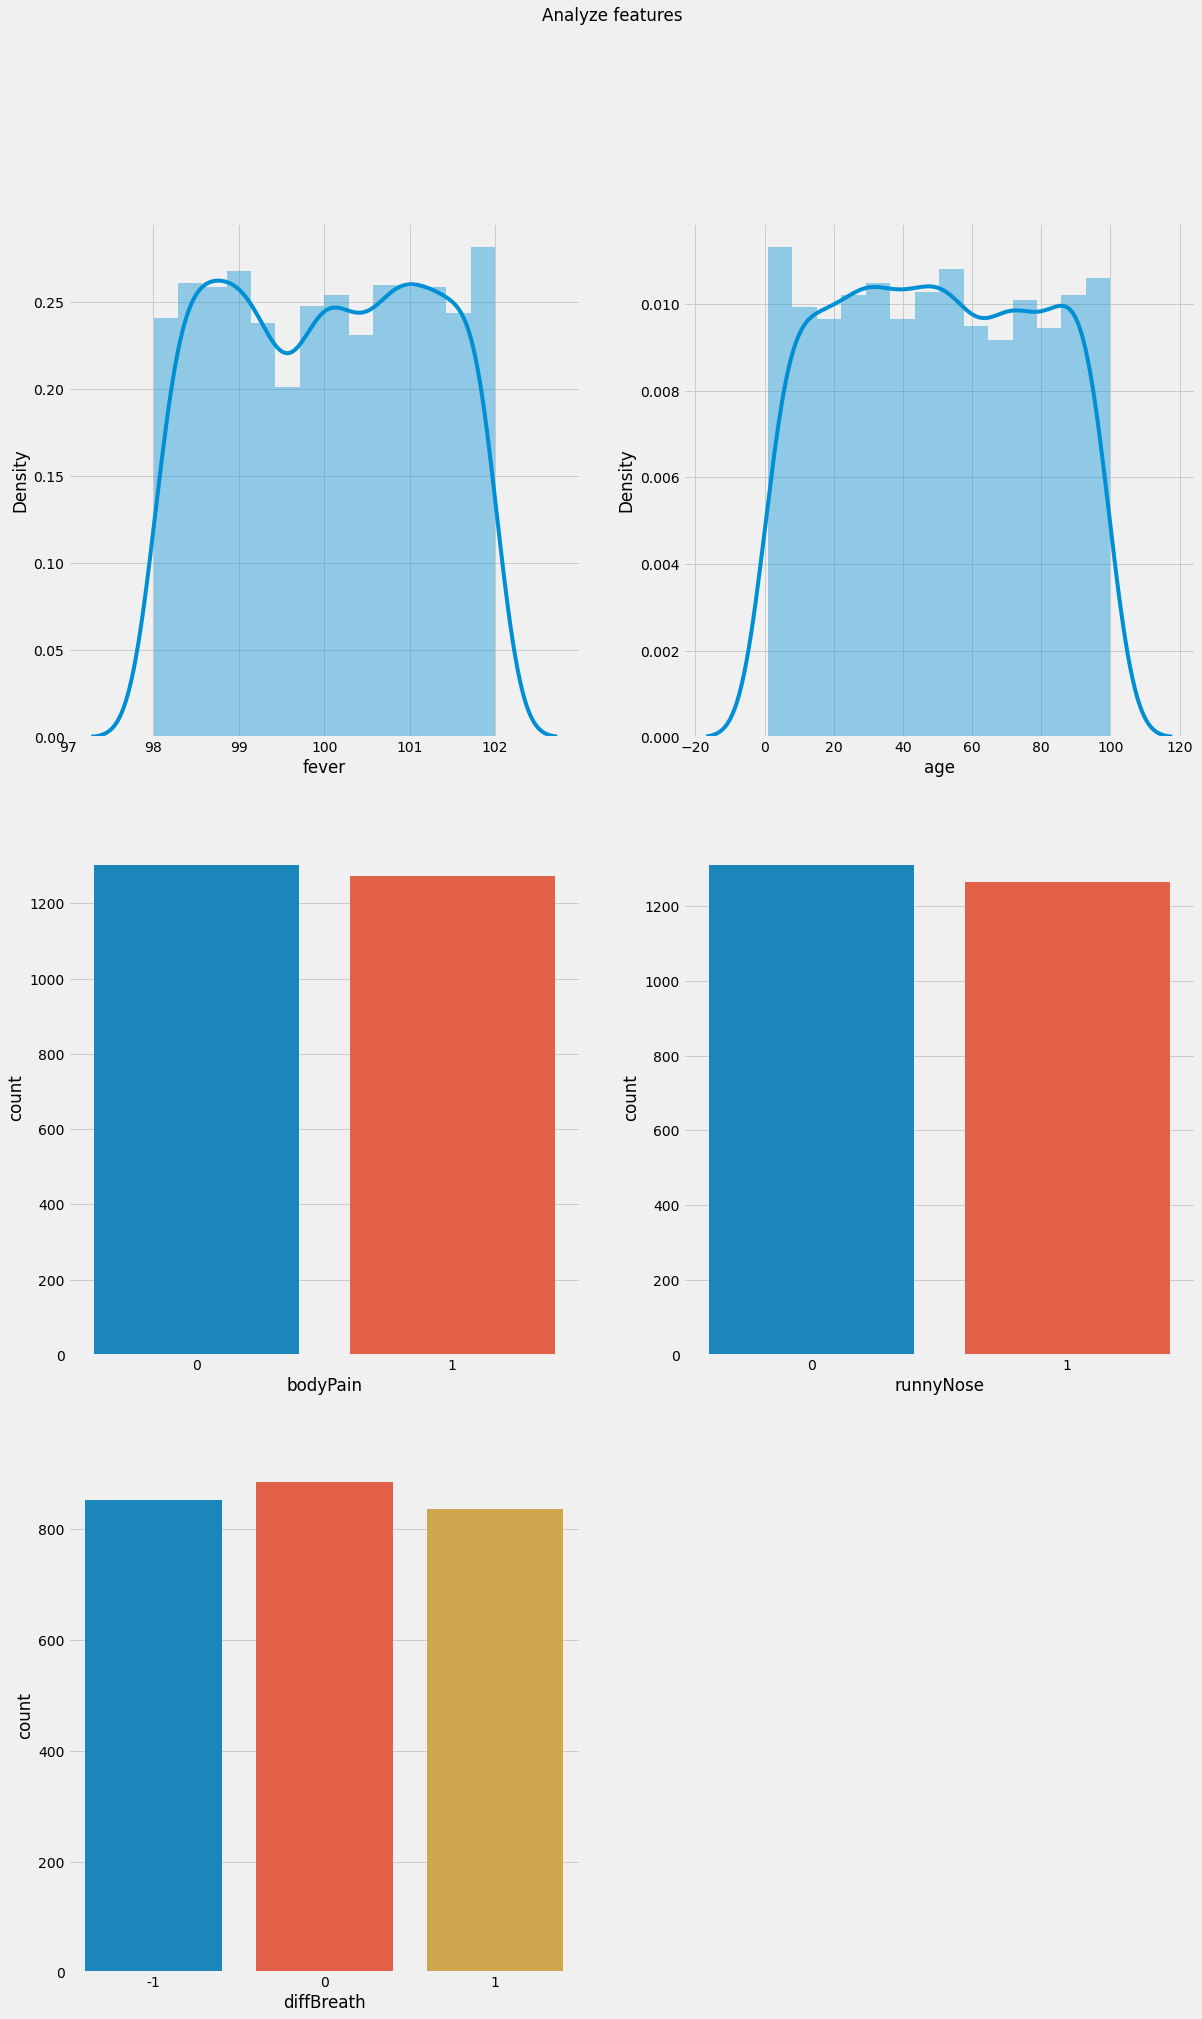

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize']=(18,30)
plt.style.use('fivethirtyeight')

plt.subplot(3,2,1)
sns.distplot(data['fever'])

plt.subplot(3,2,2)
sns.distplot(data['age'])

plt.subplot(3,2,3)
sns.countplot(data['bodyPain'])

plt.subplot(3,2,4)
sns.countplot(data['runnyNose'])

plt.subplot(3,2,5)
sns.countplot(data['diffBreath'])

plt.suptitle('Analyze features')
plt.show()

# Train Test Split

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split 

In [10]:
x=data.iloc[:,:-1]
y=data['infectionProb']
x
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)
x_train.shape
x_train

,fever,bodyPain,age,runnyNose,diffBreath
2296,98.721366,0,95,1,-1
133,101.479760,1,9,0,-1
2562,98.770790,0,30,0,1
557,98.310140,1,62,0,-1
812,98.505583,0,52,0,-1
...,...,...,...,...,...
960,99.887035,1,33,0,1
905,100.322165,0,89,0,0
1096,101.244492,0,67,0,0
235,100.841500,1,82,0,0


In [11]:
x_test.shape

(515, 5)

In [12]:
xtrain_array=x_train.to_numpy() 
xtest_array=x_test.to_numpy() 
xtrain_array

array([[ 98.72136561,   0.        ,  95.        ,   1.        ,
         -1.        ],
       [101.4797596 ,   1.        ,   9.        ,   0.        ,
         -1.        ],
       [ 98.77079028,   0.        ,  30.        ,   0.        ,
          1.        ],
       ...,
       [101.2444918 ,   0.        ,  67.        ,   0.        ,
          0.        ],
       [100.8415002 ,   1.        ,  82.        ,   0.        ,
          0.        ],
       [101.3355729 ,   0.        ,  17.        ,   1.        ,
          1.        ]])

In [13]:
ytrain_array=y_train.to_numpy().reshape(2060, )
ytest_array=y_test.to_numpy().reshape(515,) 
ytest_array

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,

In [14]:
print("Data size : ",data.shape)
print("x_train : ",x_train.shape)
print("x_test : ",x_test.shape)
print("y_train : ",y_train.shape)
print("y_test : ",y_test.shape)

# x_train.shape

Data size :  (2575, 6)
x_train :  (2060, 5)
x_test :  (515, 5)
y_train :  (2060,)
y_test :  (515,)


# Logistic regression either 0 or 1

In [15]:
 from sklearn.linear_model import LogisticRegression

In [16]:
lr=LogisticRegression()
lr

LogisticRegression()

In [17]:
x_pred=lr.fit(x_train,y_train)
x_pred

LogisticRegression()

In [18]:
d=x_train.iloc[:4,:x_train.shape[1]]
print(d)

d1=y_train.iloc[:10,]
d1
# a=x_pred.predict(x_test)
# print(a.shape)
# print(a)
# y_test

           fever  bodyPain  age  runnyNose  diffBreath
2296   98.721366         0   95          1          -1
133   101.479760         1    9          0          -1
2562   98.770790         0   30          0           1
557    98.310140         1   62          0          -1


2296    0
133     0
2562    0
557     1
812     0
1381    1
1131    1
2027    1
2519    1
348     0
Name: infectionProb, dtype: int64

In [19]:
# predict() : define event happen (1) else (0) not happen
givenFeatures=[[98.310140,1,62,0,-1]]
prob=x_pred.predict(givenFeatures)
prob

array([0], dtype=int64)

In [20]:
# predict_proba() :
# 1 value not event gonna happen , 2 value event gonna happen
givenFeatures=[[98.310140,1,62,0,-1]]
infProb=x_pred.predict_proba(givenFeatures)
infProb

array([[0.50024304, 0.49975696]])

In [21]:
print('infProb : ',infProb)
# fetching probability that person having infection 
infProb[0][1]

infProb :  [[0.50024304 0.49975696]]


0.49975695784099117

In [22]:
x_train

,fever,bodyPain,age,runnyNose,diffBreath
2296,98.721366,0,95,1,-1
133,101.479760,1,9,0,-1
2562,98.770790,0,30,0,1
557,98.310140,1,62,0,-1
812,98.505583,0,52,0,-1
...,...,...,...,...,...
960,99.887035,1,33,0,1
905,100.322165,0,89,0,0
1096,101.244492,0,67,0,0
235,100.841500,1,82,0,0
